In [1]:
import torch

# Check if CUDA is available
device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')

torch.set_default_device(device)
print(f"Using device = {torch.get_default_device()}")


Using device = cuda:0


In [2]:
import string
import unicodedata

allowed_characters = string.ascii_letters + " .,;'" + "_"
n_letters = len(allowed_characters)


def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != "Mn"
        and c in allowed_characters
    )
print (f"converting 'Ślusàrski' to {unicodeToAscii('Ślusàrski')}")

converting 'Ślusàrski' to Slusarski


In [3]:
def letterToIndex(letter):
    if letter not in allowed_characters:
        return allowed_characters.find("_")
    else:
        return allowed_characters.find(letter)


def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters).to(device)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor


In [4]:
print (f"The letter 'a' becomes {lineToTensor('a')}") #notice that the first position in the tensor = 1
print("-----------------------------------")
print (f"The name 'Ahn' becomes {lineToTensor('Ahn')}") #notice 'A' sets the 27th index to 1

The letter 'a' becomes tensor([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.]]], device='cuda:0')
-----------------------------------
The name 'Ahn' becomes tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.

In [5]:
from io import open
import glob
import os
import time

import torch
from torch.utils.data import Dataset

class NamesDataset(Dataset):

    def __init__(self, data_dir):
        self.data_dir = data_dir #for provenance of the dataset
        self.load_time = time.localtime #for provenance of the dataset
        labels_set = set() #set of all classes

        self.data = []
        self.data_tensors = []
        self.labels = []
        self.labels_tensors = []

        #read all the ``.txt`` files in the specified directory
        text_files = glob.glob(os.path.join(data_dir, '*.txt'))
        for filename in text_files:
            label = os.path.splitext(os.path.basename(filename))[0]
            labels_set.add(label)
            lines = open(filename, encoding='utf-8').read().strip().split('\n')
            for name in lines:
                self.data.append(name)
                self.data_tensors.append(lineToTensor(name))
                self.labels.append(label)

        #Cache the tensor representation of the labels
        self.labels_uniq = list(labels_set)
        for idx in range(len(self.labels)):
            temp_tensor = torch.tensor([self.labels_uniq.index(self.labels[idx])], dtype=torch.long)
            self.labels_tensors.append(temp_tensor)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        data_item = self.data[idx]
        data_label = self.labels[idx]
        data_tensor = self.data_tensors[idx]
        label_tensor = self.labels_tensors[idx]

        return label_tensor, data_tensor, data_label, data_item

In [6]:
alldata = NamesDataset("data/names")
print(f"loaded {len(alldata)} items of data")
print(f"example = {alldata[0]}")

loaded 20074 items of data
example = (tensor([15], device='cuda:0'), tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 1., 0.

In [7]:
train_set, test_set = torch.utils.data.random_split(alldata, [.85, .15], generator=torch.Generator(device=device).manual_seed(224))

print(f"train examples = {len(train_set)}, validation examples = {len(test_set)}")

train examples = 17063, validation examples = 3011


In [8]:
import torch.nn as nn
import torch.nn.functional as F

class CharRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(CharRNN, self).__init__()

        self.rnn = nn.RNN(input_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, line_tensor):
        rnn_out, hidden = self.rnn(line_tensor)
        output = self.h2o(hidden[0])
        output = self.softmax(output)

        return output
n_hidden = 128
rnn=CharRNN(n_letters, n_hidden, len(alldata.labels_uniq))
print(rnn)

CharRNN(
  (rnn): RNN(58, 128)
  (h2o): Linear(in_features=128, out_features=18, bias=True)
  (softmax): LogSoftmax(dim=1)
)


In [9]:
def label_from_output(output, output_labels):
    top_n, top_i = output.topk(1)
    label_i = top_i[0].item()
    return output_labels[label_i], label_i

input = lineToTensor('Albert')
output = rnn(input) #this is equivalent to ``output = rnn.forward(input)``
print(output)
print(label_from_output(output, alldata.labels_uniq))

tensor([[-2.9879, -2.9424, -2.9072, -2.8516, -2.8343, -2.9256, -3.0111, -2.8249,
         -2.7742, -2.9205, -2.8173, -2.8043, -2.9122, -2.8678, -2.9217, -2.8301,
         -3.0123, -2.9241]], device='cuda:0', grad_fn=<LogSoftmaxBackward0>)
('English', 8)


In [10]:
import random
import numpy as np

def evaluate(rnn, dataset, criterion):
    """
    Evaluate loss and accuracy on the provided dataset.
    """
    rnn.eval()
    correct = 0
    total_loss = 0
    with torch.no_grad():
        for i in range(len(dataset)):
            label_tensor, text_tensor, label, text = dataset[i]
            output = rnn(text_tensor)
            loss = criterion(output, label_tensor)
            total_loss += loss.item()

            predicted_label, _ = label_from_output(output, alldata.labels_uniq)
            if predicted_label == label:
                correct += 1
    accuracy = correct / len(dataset)
    avg_loss = total_loss / len(dataset)
    return avg_loss, accuracy


def train(rnn, training_data, validation_data, n_epoch=10, n_batch_size=64, report_every=1, learning_rate=0.2, criterion=nn.NLLLoss()):
    current_loss = 0
    all_train_losses = []
    all_val_losses = []
    all_val_accuracies = []
    rnn.train()
    optimizer = torch.optim.SGD(rnn.parameters(), lr=learning_rate)

    start = time.time()
    print(f"Training on dataset with n = {len(training_data)}")

    for epoch in range(1, n_epoch + 1):
        rnn.train()
        batches = list(range(len(training_data)))
        random.shuffle(batches)
        batches = np.array_split(batches, len(batches) // n_batch_size)

        correct_train = 0
        total_train = 0

        for batch in batches:
            batch_loss = 0
            for i in batch:
                label_tensor, text_tensor, label, text = training_data[i]
                output = rnn(text_tensor)
                loss = criterion(output, label_tensor)
                batch_loss += loss

                # Training accuracy calculation
                predicted_label, _ = label_from_output(output, alldata.labels_uniq)
                if predicted_label == label:
                    correct_train += 1
                total_train += 1

            batch_loss.backward()
            nn.utils.clip_grad_norm_(rnn.parameters(), 3)
            optimizer.step()
            optimizer.zero_grad()
            current_loss += batch_loss.item() / len(batch)

        train_acc = correct_train / total_train
        avg_train_loss = current_loss / len(batches)
        all_train_losses.append(avg_train_loss)

        # Evaluate on validation set
        val_loss, val_acc = evaluate(rnn, validation_data, criterion)
        all_val_losses.append(val_loss)
        all_val_accuracies.append(val_acc)

        if epoch % report_every == 0:
            print(f"Epoch {epoch}/{n_epoch} - Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

        current_loss = 0

    end = time.time()
    print(f"\nTraining completed in {end - start:.2f} seconds")

    return all_train_losses, all_val_losses, all_val_accuracies


In [11]:
start = time.time()
train_losses, val_losses, val_accuracies = train(
    rnn,
    train_set,
    test_set,
    n_epoch=27,
    learning_rate=0.15,
    report_every=5
)
end = time.time()
print(f"Training took {end - start} seconds")

Training on dataset with n = 17063
Epoch 5/27 - Train Loss: 0.8803, Train Acc: 0.7288, Val Loss: 0.8799, Val Acc: 0.7383
Epoch 10/27 - Train Loss: 0.6912, Train Acc: 0.7861, Val Loss: 0.8466, Val Acc: 0.7400
Epoch 15/27 - Train Loss: 0.5772, Train Acc: 0.8176, Val Loss: 0.7435, Val Acc: 0.7772
Epoch 20/27 - Train Loss: 0.4917, Train Acc: 0.8417, Val Loss: 0.8019, Val Acc: 0.7685
Epoch 25/27 - Train Loss: 0.4338, Train Acc: 0.8555, Val Loss: 0.7587, Val Acc: 0.7821

Training completed in 697.59 seconds
Training took 699.7969439029694 seconds


In [12]:
print(f"Model is on: {next(rnn.parameters()).device}")

Model is on: cuda:0


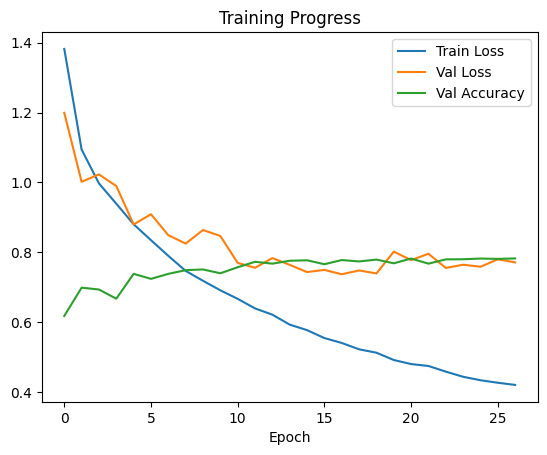

In [13]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.plot(val_accuracies, label='Val Accuracy')
plt.legend()
plt.title("Training Progress")
plt.xlabel("Epoch")
plt.show()


NameError: name 'ticker' is not defined

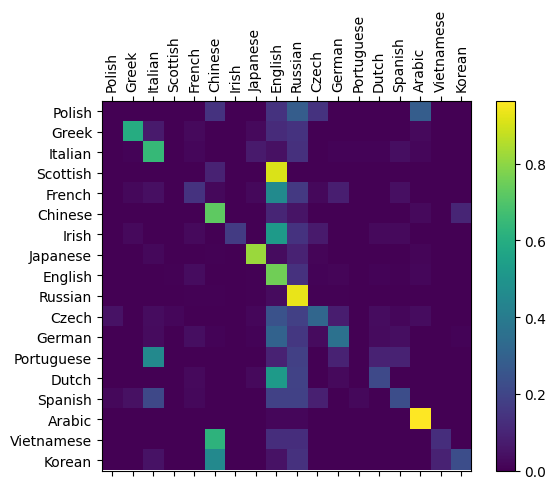

In [14]:
def evaluate(rnn, testing_data, classes):
    confusion = torch.zeros(len(classes), len(classes))

    rnn.eval() #set to eval mode
    with torch.no_grad(): # do not record the gradients during eval phase
        for i in range(len(testing_data)):
            (label_tensor, text_tensor, label, text) = testing_data[i]
            output = rnn(text_tensor)
            guess, guess_i = label_from_output(output, classes)
            label_i = classes.index(label)
            confusion[label_i][guess_i] += 1

    # Normalize by dividing every row by its sum
    for i in range(len(classes)):
        denom = confusion[i].sum()
        if denom > 0:
            confusion[i] = confusion[i] / denom

    # Set up plot
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(confusion.cpu().numpy()) #numpy uses cpu here so we need to use a cpu version
    fig.colorbar(cax)

    # Set up axes
    ax.set_xticks(np.arange(len(classes)), labels=classes, rotation=90)
    ax.set_yticks(np.arange(len(classes)), labels=classes)

    # Force label at every tick
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    # sphinx_gallery_thumbnail_number = 2
    plt.show()



evaluate(rnn, test_set, classes=alldata.labels_uniq)